In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("pax_local_all_agreements_data.csv")
data

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,LocState,LocArmedGr,ReDomEld,LocComSoc,IntActor,OthActor,RitPray,Grieve,Cattle,Cover
0,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,125,Bosnia peace process,Europe and Eurasia,1210,1,Decisions on Mostar of 12 February 1997,1997-02-12,Multiparty signed/agreed,...,1,0,0,0,1,0,0,1,0,1
1,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1644,1,Agreement on the disarmament of the able-bodie...,1995-07-24,Multiparty signed/agreed,...,0,0,0,1,1,1,0,0,0,0
2,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,125,Bosnia peace process,Europe and Eurasia,1850,1,Agreement,1994-03-04,Multiparty signed/agreed,...,0,0,0,1,1,0,0,0,0,0
3,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1297,1,Declaration,1993-10-22,Multiparty signed/agreed,...,0,1,0,0,1,0,0,0,0,0
4,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1569,1,Joint Statement,1993-10-21,Multiparty signed/agreed,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,Yemen,Inter-group,145,Yemen Inter-group Agreements,Middle East and North Africa,2226,2,Agreement Between the Houthis and the Arhab Tr...,2014-02-09,Multiparty signed/agreed,...,0,1,0,0,0,0,1,1,0,0
282,Yemen,Inter-group,145,Yemen Inter-group Agreements,Middle East and North Africa,2005,2,Ajmar Agreement,2014-02-04,Multiparty signed/agreed,...,0,1,0,0,0,0,1,1,0,0
283,Yemen,Inter-group,145,Yemen Inter-group Agreements,Middle East and North Africa,2215,2,"Agreement between the Bani Maudhah, Bani al-Sh...",2014-01-20,Multiparty signed/agreed,...,0,0,1,0,0,0,1,1,0,0
284,Yemen,Inter-group,145,Yemen Inter-group Agreements,Middle East and North Africa,2063,2,Letter to Presidential Mediation Council on Te...,2014-01-11,Unilateral document,...,0,0,0,1,0,0,1,1,0,0


In [3]:
data = data.loc[(data['Reg'] == "Africa (excl MENA)") | (data['Reg'] == "Middle East and North Africa")]
data1 = data[["Con","Reg"]]
data2 = data1.groupby(["Con"]).count()
np.sum(data2['Reg'])


250

In [4]:
d = list(data2["Reg"])
print(d)

[2, 19, 1, 1, 5, 4, 15, 1, 1, 32, 10, 4, 2, 6, 5, 6, 2, 25, 1, 1, 6, 1, 75, 25]


In [5]:
data2.insert(1,"Sum",[i for i in d])
data2 = data2.drop(["Reg"],axis = 1)
data2
data2.to_csv("a.csv")

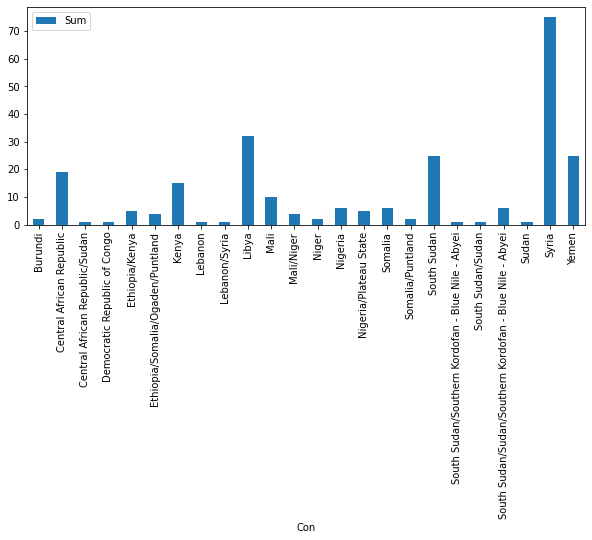

In [6]:
data2[["Sum"]].plot(kind='bar', figsize=(10, 4))

In [7]:
#data3 = data2.set_index("Con",inplace = False)
con_data = data2.loc[data2['Sum']>20]
con_data

,Sum
Con,
Libya,32
South Sudan,25
Syria,75
Yemen,25


In [8]:
conTime = data.set_index("PP",inplace = False)

In [9]:
conTime = conTime.loc[(conTime['Con']=="Libya")|(conTime['Con']=="South Sudan") |(conTime['Con']=="Syria")|(conTime['Con']=="Yemen")]
conTime

,Con,Contp,PPName,Reg,AgtId,Ver,Agt,Dat,Status,Lgt,...,LocState,LocArmedGr,ReDomEld,LocComSoc,IntActor,OthActor,RitPray,Grieve,Cattle,Cover
PP,,,,,,,,,,,,,,,,,,,,,
72,Libya,Inter-group,Libyan local processes,Middle East and North Africa,2217,2,Statement from the Sheikhs and Dignitaries of ...,2019-01-22,Multiparty signed/agreed,1,...,0,0,1,1,0,0,1,1,0,1
70,Libya,Inter-group,Libyan peace process,Middle East and North Africa,2143,2,Ceasefire in Southern Tripoli,2018-09-28,Unilateral document,1,...,0,0,1,0,0,0,1,1,0,0
72,Libya,Inter-group,Libyan local processes,Middle East and North Africa,2229,2,Meeting Minutes\r\n,2018-09-23,Multiparty signed/agreed,1,...,1,0,0,0,0,0,0,1,0,0
70,Libya,Government,Libyan peace process,Middle East and North Africa,2216,2,Agreement [Ceasefire between Tripoli and Tarho...,2018-09-21,Multiparty signed/agreed,3,...,1,0,0,0,0,0,0,1,0,0
70,Libya,Government,Libyan peace process,Middle East and North Africa,2136,2,Agreement to Consolidate the Ceasefire (Zawiyy...,2018-09-09,Multiparty signed/agreed,3,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Yemen,Inter-group,Yemen Inter-group Agreements,Middle East and North Africa,2226,2,Agreement Between the Houthis and the Arhab Tr...,2014-02-09,Multiparty signed/agreed,1,...,0,1,0,0,0,0,1,1,0,0
145,Yemen,Inter-group,Yemen Inter-group Agreements,Middle East and North Africa,2005,2,Ajmar Agreement,2014-02-04,Multiparty signed/agreed,1,...,0,1,0,0,0,0,1,1,0,0
145,Yemen,Inter-group,Yemen Inter-group Agreements,Middle East and North Africa,2215,2,"Agreement between the Bani Maudhah, Bani al-Sh...",2014-01-20,Multiparty signed/agreed,1,...,0,0,1,0,0,0,1,1,0,0


In [10]:
conTime = conTime[["Dat","Con"]]
conTime = conTime.sort_values(by =["Dat"])
conTime = conTime.reset_index(drop=False)
#conTime = conTime.set_index("Dat",inplace = False)
#conTime

In [11]:
da = list(conTime["Dat"])
f = [i.split("-")[0] for i in da]
conTime.insert(0,"Year",[i for i in f])
conTime.drop("Dat",axis = 1)

,Year,PP,Con
0,1999,24,South Sudan
1,1999,24,South Sudan
2,1999,24,South Sudan
3,2000,24,South Sudan
4,2002,24,South Sudan
...,...,...,...
152,2019,151,South Sudan
153,2019,151,South Sudan
154,2019,145,Yemen
155,2019,145,Yemen


In [12]:
conTime1 = conTime["PP"].groupby([conTime["Year"],conTime["Con"]])

In [13]:
conTime1 = conTime1.count()
conTime1

Year  Con        
1999  South Sudan     3
2000  South Sudan     1
2002  South Sudan     1
2011  South Sudan     1
2012  South Sudan     1
      Syria           1
2013  South Sudan     1
      Syria           3
2014  South Sudan     3
      Syria           8
      Yemen          14
2015  Libya           5
      South Sudan     2
      Syria          10
      Yemen           2
2016  Libya           6
      South Sudan     1
      Syria          13
      Yemen           5
2017  Libya           6
      South Sudan     5
      Syria          23
2018  Libya          14
      South Sudan     2
      Syria          14
      Yemen           2
2019  Libya           1
      South Sudan     3
      Syria           3
      Yemen           2
2020  South Sudan     1
Name: PP, dtype: int64

In [14]:
#conTime.pivot(index='Year', columns='Con', values='baz')

In [15]:
conTime2 = conTime1.unstack()

In [16]:
conTime2 = conTime2.fillna(0)
conTime2

Con,Libya,South Sudan,Syria,Yemen
Year,,,,
1999,0.0,3.0,0.0,0.0
2000,0.0,1.0,0.0,0.0
2002,0.0,1.0,0.0,0.0
2011,0.0,1.0,0.0,0.0
2012,0.0,1.0,1.0,0.0
2013,0.0,1.0,3.0,0.0
2014,0.0,3.0,8.0,14.0
2015,5.0,2.0,10.0,2.0
2016,6.0,1.0,13.0,5.0


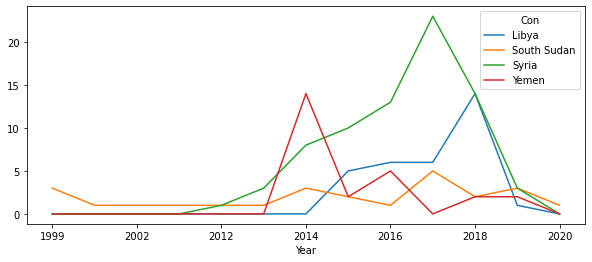

In [17]:
conTime2[["Libya","South Sudan","Syria","Yemen"]].plot(kind='line', figsize=(10, 4))
conTime2.to_csv("b.csv")

In [18]:
conTime3 = conTime2[3:]
conTime3


Con,Libya,South Sudan,Syria,Yemen
Year,,,,
2011,0.0,1.0,0.0,0.0
2012,0.0,1.0,1.0,0.0
2013,0.0,1.0,3.0,0.0
2014,0.0,3.0,8.0,14.0
2015,5.0,2.0,10.0,2.0
2016,6.0,1.0,13.0,5.0
2017,6.0,5.0,23.0,0.0
2018,14.0,2.0,14.0,2.0
2019,1.0,3.0,3.0,2.0


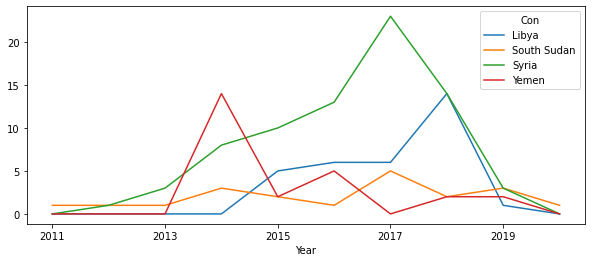

In [19]:
conTime3[["Libya","South Sudan","Syria","Yemen"]].plot(kind='line', figsize=(10, 4))

In [20]:
conTime3.to_csv("c.csv")